Train, Test and Validation Test data size

Label wise split in Train Data

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ast
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from imblearn.over_sampling import SMOTE
from tensorflow.keras.layers import Input, Flatten, SpatialDropout1D, Bidirectional, Reshape
from sklearn.metrics import accuracy_score, classification_report
# Use the 'Text' column for text data# Use TfidfVectorizer for the 'Tokens' column
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(df['Text'])

# Encode target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Handle class imbalance by converting labels to one-hot encoding
y_categorical = to_categorical(y_encoded)

In [46]:
# Define CNN model
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(X_tfidf.shape[1],)))
model.add(Reshape((512, 1)))
model.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=32,kernel_size=5,activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten()) # Flatten the output from MaxPooling1D
model.add(Dense(64, activation='relu'))

model.add(Dense(2, activation='softmax'))
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, min_delta=0.001)

# Sort the indices of the sparse matrix
X_tfidf.sort_indices()

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_tfidf, y_categorical, test_size=0.1, random_state=42)

# Train the model
history = model.fit(X_train, y_train, epochs=15, batch_size=32,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stopping],
                    verbose=1)

# Evaluate the model on the validation set
loss, accuracy = model.evaluate(X_val, y_val)
print(f'Validation accuracy: {accuracy:.3f}')

Epoch 1/15
495/495 [==============================] - 151s 301ms/step - loss: 0.6278 - accuracy: 0.6438 - val_loss: 0.5898 - val_accuracy: 0.6852
Epoch 2/15
495/495 [==============================] - 152s 307ms/step - loss: 0.4230 - accuracy: 0.8012 - val_loss: 0.6588 - val_accuracy: 0.6506
Epoch 3/15
495/495 [==============================] - 150s 303ms/step - loss: 0.2250 - accuracy: 0.9031 - val_loss: 0.9413 - val_accuracy: 0.6545
Epoch 4/15
495/495 [==============================] - 151s 305ms/step - loss: 0.1244 - accuracy: 0.9446 - val_loss: 1.4739 - val_accuracy: 0.6472
Epoch 5/15
495/495 [==============================] - 151s 306ms/step - loss: 0.0855 - accuracy: 0.9619 - val_loss: 1.4421 - val_accuracy: 0.6432
Epoch 6/15
55/55 [==============================] - 1s 11ms/step - loss: 1.8625 - accuracy: 0.6352
Validation accuracy: 0.635


Ploting the Confusion Matrix and Classification Report of best Model

55/55 [==============================] - 1s 10ms/step
confusion Matrix:
 [[667 360]
 [282 451]]


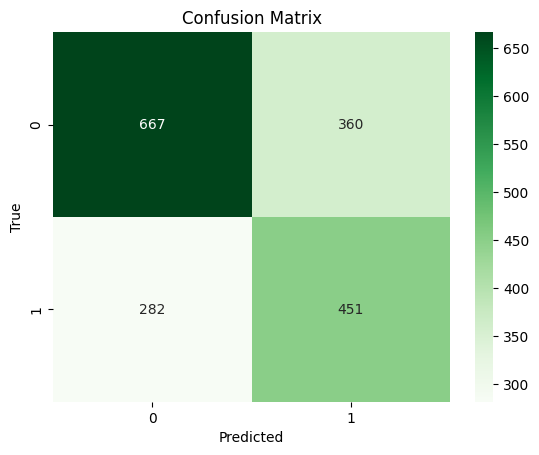

In [47]:
# Predict probabilities on the validation set
y_pred_probs = model.predict(X_val)

# Get predicted labels (class with highest probability)
y_pred = np.argmax(y_pred_probs, axis=1)

# Inverse transform encoded true labels to original form
y_val_original = np.argmax(y_val, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_val_original, y_pred)
print("confusion Matrix:\n", cm)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [48]:

# Extracting metrics separately
print("Accuracy:", accuracy_score(y_val_original, y_pred))
print("Classification Report:\n", classification_report(y_val_original, y_pred))

accuracy = accuracy_score(y_val_original, y_pred)

classification_report_dict = classification_report(y_val_original, y_pred, output_dict=True)
precision = classification_report_dict['weighted avg']['precision']
recall = classification_report_dict['weighted avg']['recall']
f1_score = classification_report_dict['weighted avg']['f1-score']


Accuracy: 0.6352272727272728
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.65      0.68      1027
           1       0.56      0.62      0.58       733

    accuracy                           0.64      1760
   macro avg       0.63      0.63      0.63      1760
weighted avg       0.64      0.64      0.64      1760

